# **Lab #2: Quantum Computing on Azure Quantum with Q# and Jupyter Notebooks** 
## **Microsoft Winter School, February 5th 2023**

### **Summary**

In today's lab, we are going to build a random number generator while learning about quantum computing and Q#. 

Note that only a quantum computer can generate **truly random** numbers. Classical computers are only able to create what we call **pseudorandom** numbers, because, technically, one can predict which number a classical computer will generate (given enough information).

<br>

### **Learning Objectives**
* Get familiar with Azure Quantum platform and notebooks.
* Create simple programs and quantum circuits in Q#.
* Learn different ways to get results from your programs, and how to visualize them.
* Build a random number generator with qubits.

## **Part #0: Imports**

**Run the code below to import all necessary libraries and functions for this lab.**

<br>

**NOTE:** Azure Quantum Workspace Notebooks allow you to run both Q# and Python code. We are going to use Python to visualize our results. Every cell containing Q# code needs to be identified with `%%qsharp`. We will be using _Python3 kernel_, so, **please, make sure the correct kernel is selected at the top!**

In [1]:
from matplotlib import pyplot

import qsharp
import qsharp.azure

# Connect to available targets
targets = qsharp.azure.connect(
    resourceId="/subscriptions/cdd4985b-2017-484b-bb09-a575bd40587a/resourceGroups/AzureQuantum/providers/Microsoft.Quantum/Workspaces/qxqwinterschoolAndrzejDubaj",
    location="westcentralus")

Preparing Q# environment...
...

Connecting to Azure Quantum...

Authenticated using Microsoft.Azure.Quantum.Authentication.TokenFileCredential


Connected to Azure Quantum workspace qxqwinterschoolAndrzejDubaj in location westcentralus.


In [2]:
%%qsharp
open Microsoft.Quantum.Arrays;
open Microsoft.Quantum.Measurement;
open Microsoft.Quantum.Convert;

## **Part #1: Basics of Q#**

Let's learn about **operations** in Q# by working with purely classical data types and functionality.

### **Exercise #1.1: Create Your First Q# Operation (Practice Together)**

We will now create our first piece of Q# code! Any time you write Q# code, it has to be embedded in an **operation**. We will do this in three parts:

1. Declare the operation in python so that it is recognized later on.
2. Create an operation in Q# called `HelloWorld`.
3. Simulate the operation in python.

#### **1. Declare the operation in python so that it is recognized later on.**

In [3]:
HelloWorld: any = None

#### **2. Create an operation in Q# called `HelloWorld`.** 

Let's complete the code below so that this operation:
* Takes no parameters.
* Returns the `Unit` type.
* Prints the message `"Hello, world!"`.

In [4]:
%%qsharp
operation HelloWorld() : Unit {
    Message($" Hello, world!");
}

#### **3. Simulate the operation in python.**

Since operations *could* have quantum operations, we have to use a *quantum simulator*. 

**Run the cell below to use Microsoft's simulator.**

In [5]:
HelloWorld.simulate()

 Hello, world!


()

**Congratulations on completing your first Q# operation!**

### **Exercise #1.2: Print Your Name (Practice Together)**

Now, we will write similar code as above, but to print your name out using a parameter. We will do this in three parts:

1. Declare the operation in python so that it is recognized later on.
2. Create an operation in Q# called `PrintName`.
3. Simulate the operation in python.

#### **1. Declare the operation in python so that it is recognized later on.**

In [6]:
PrintName : any = None

#### **2. Create an operation in Q# called `PrintName`.** 

Let's complete the code below so that this operation:
* Takes one parameter called `name` that is of type `String`.
* Returns the `Unit` type.
* Prints the message `"My name is <name>"`.

In [7]:
%%qsharp
operation PrintName(name : String) : Unit {
    Message($"My name is {name}");
}

#### **3. Simulate the operation in python.**

**Run the cell below to use Microsoft's simulator.**

In [8]:
PrintName.simulate(name = "Andrzej")

My name is Andrzej


()

---
<center>

### **Let's go back to the slides.**

</center>

---

### **Exercise #1.3: Immutable Ints (Practice Together)**

Let's see how to use immutable Ints in Q#. Specifically, we will create an immutable Int and try to modify it. We will follow the same 3 step flow as above:

1. Declare the operation in python.
2. Create the operation in Q#.
3. Simulate the operation in python.

#### **1. Declare the operation in python.**

Let's call it `MutateImmutable`.

In [9]:
MutateImmutable : any = None

#### **2. Create the operation in Q#.**


Let's complete the code below so that this operation:
* Takes no parameters.
* Returns the `Unit` type.
* Creates an immutable Int with the value 2 and tries to increment it by 3.

In [10]:
%%qsharp

operation MutateImmutable() : Unit {
    let x = 2;
    x += 3;
    Message($"x = {x}");
}

fail: Microsoft.Quantum.IQSharp.Snippets[0]
      QS3001 (/snippet_.qs:Microsoft.VisualStudio.LanguageServer.Protocol.Range): Syntax does not match any known patterns.


TypeError: 'NoneType' object is not iterable

#### **3. Simulate the operation in python.**

In [11]:
MutateImmutable.simulate()

AttributeError: 'NoneType' object has no attribute 'simulate'

### **Exercise #1.4: Mutable Bool (Practice Together)**

Let's see how to use mutable Bools in Q#. Specifically, we will create an immutable Bool and try to modify it. We will follow the same 3 step flow as above:

1. Declare the operation in python.
2. Create the operation in Q#.
3. Simulate the operation in python.

#### **1. Declare the operation in python.**

Let's call it `MutateBool`.

In [12]:
MutateBool : any = None

#### **2. Create the operation in Q#.**


Let's complete the code below so that this operation:
* Takes no parameters.
* Returns the `Unit` type.
* Creates an mutable Bool with the value false and tries to change it to true.

In [13]:
%%qsharp

operation MutateBool() : Unit {
    mutable y = false;
    set y = true;

    Message($"y = {y}");
}

#### **3. Simulate the operation in python.**

In [14]:
MutateBool.simulate()

y = True


()

---
<center>

### **Let's go back to the slides.**

</center>

---

### **Exercise #1.5: Immutable Array of Ints (Practice Together)**

Let's see how to create Arrays in Q#. Specifically, we will create an Array of Ints of size 10 and with all elements equal to 2. We will follow the same 3 step flow as above:

1. Declare the operation in python.
2. Create the operation in Q#.
3. Simulate the operation in python.

#### **1. Declare the operation in python.**

Let's call it `GetTwos`.

In [15]:
GetTwos : any = None

#### **2. Create the operation in Q#.**


Let's complete the code below so that this operation:
* Takes no parameters.
* Returns the `Int[]` type, which is an array of size 10 filled with 2s.

In [16]:
%%qsharp

operation GetTwos() : Int[] {
    
    let a = [2, size = 10];
    
    return a;
}

#### **3. Simulate the operation in python.**

In [17]:
GetTwos.simulate()

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2]

### **Exercise #1.6: Mutable Array of Ints (Practice Together)**

Let's see how to create and change mutable Arrays in Q#. Specifically, we will create an Array of Ints of size 10 and with all elements equal to 2. Then we will change the first value to 5. We will follow the same 3 step flow as above:

1. Declare the operation in python.
2. Create the operation in Q#.
3. Simulate the operation in python.

#### **1. Declare the operation in python.**

Let's call it `ChangeArray`.

In [18]:
ChangeArray : any = None

#### **2. Create the operation in Q#.**


Let's complete the code below so that this operation:
* Takes no parameters.
* Returns the `Int[]` type, which is an array of size 10 filled with 2s except for the first element, which is 5.

In [20]:
%%qsharp

operation ChangeArray() : Int[] {
    
    mutable a = [2, size = 10];

    set a w/= 0 <- 5;
    
    return a;
}

#### **3. Simulate the operation in python.**

In [21]:
ChangeArray.simulate()

[5, 2, 2, 2, 2, 2, 2, 2, 2, 2]

---
<center>

### **Let's go back to the slides.**

</center>

---

### **Exercise #1.7: Looping through an Array of Bools (Practice Together)**

Let's see how to loop through Arrays in Q#. Specifically, we will print the index of all elements that are `true`. We will follow the same 3 step flow as above:

1. Declare the operation in python.
2. Create the operation in Q#.
3. Simulate the operation in python.

#### **1. Declare the operation in python.**

Let's call it `PrintTrues`.

In [22]:
PrintTrues : any = None

#### **2. Create the operation in Q#.**


Let's complete the code below so that this operation:
* Takes one parameter called `arr` that is of type `Bool[]`.
* Returns the `Unit` type.
* Loops through all elements of `arr` and prints the index of any element that is `true`.

In [24]:
%%qsharp

operation PrintTrues(arr : Bool[]) : Unit {
    
    for i in 0 .. Length(arr) - 1 {
        if arr[i] == true {
            Message($"{i}");
        }
    }
}

#### **3. Simulate the operation in python.**

In [25]:
PrintTrues.simulate(arr = [False, True, False, False, True])

1
4


()

### **Exercise #1.8: Modifying an Array of Ints (Practice Together)**

Lastly, let's see how to modify Arrays in Q#. Specifically, we will multiply all elements of an array by 2. We will follow the same 3 step flow as above:

1. Declare the operation in python.
2. Create the operation in Q#.
3. Simulate the operation in python.

#### **1. Declare the operation in python.**

Let's call it `DoubleArray`.

In [26]:
DoubleArray : any = None

#### **2. Create the operation in Q#.**


Let's complete the code below so that this operation:
* Takes one parameter called `nums` that is of type `Int[]`.
* Returns the `Int[]` type, which is the array `nums` where each element has been multiplied by 2.

In [27]:
%%qsharp

operation DoubleArray(nums : Int[]) : Int[] {

    mutable doubleNums = [0, size = Length(nums)];
    
    for i in 0 .. Length(nums) - 1 {
        set doubleNums w/= i <- nums[i] * 2;
    }

    return doubleNums;
}

#### **3. Simulate the operation in python.**

In [28]:
DoubleArray.simulate(nums = [-5, 0, 2, 105])

[-10, 0, 4, 210]

### **Exercise #1.9**

Create and simulate an operation that takes in an Array of Ints and prints each element. Follow the same 3 step flow as above:

1. Declare the operation in python.
2. Create the operation in Q#.
3. Simulate the operation in python.

#### **1. Declare the operation in python.**

Call it `PrintArray`.

In [29]:
PrintArray : any = None

#### **2. Create the operation in Q#.**


Let's complete the code below so that this operation:
* Takes one parameter called `nums` that is of type `Int[]`.
* Returns the `Unit` type.
* Loops through each element of the array and prints it.

In [30]:
%%qsharp

operation PrintArray(nums: Int[]) : Unit {

    for i in 0 .. Length(nums) - 1 {
        Message($"{nums[i]}");
    }
}

#### **3. Simulate the operation in python.**

Use the list provided below to test your operation.

In [31]:
numList = [10, 2, 311, 416, 528]
PrintArray.simulate(nums = numList)

10
2
311
416
528


()

### **Exercise #1.10**

Create and simulate an operation that returns an Array of Bools of size 20 such that the first 10 elements are `true` and the rest are `false`. Follow the same 3 step flow as above:

1. Declare the operation in python.
2. Create the operation in Q#.
3. Simulate the operation in python.

#### **1. Declare the operation in python.**

Call it `GetArr`.

#### **2. Create the operation in Q#.**


Let's complete the code below so that this operation:
* Takes no parameters.
* Returns the `Bool[]` type, which is an array as described above.

In [ ]:
%%qsharp

operation // COMPLETE THIS LINE
    
     // COMPLETE THIS CODE
    for i in 0 .. 9 {
       // COMPLETE THIS LINE
    }

    return // COMPLETE THIS LINE
}

#### **3. Simulate the operation in python.**

### **[OPTIONAL] Exercise #1.11**

Create and simulate an operation that takes in an array of Bools and returns an array of Ints such that `true` is mapped onto 1 and `false` is mapped onto 0. Follow the same 3 step flow as above:

1. Declare the operation in python.
2. Create the operation in Q#.
3. Simulate the operation in python.

#### **1. Declare the operation in python.**

Call it `ConvertBoolToInt`.

#### **2. Create the operation in Q#.**

In [ ]:
%%qsharp

operation ConvertBoolToInt(arr : Bool[]) : Int[] {
    // COMPLETE THIS CODE
}

#### **3. Simulate the operation in python.**

In [ ]:
myList = [False, True, True, True, False, False]
# COMPLETE THIS CODE

## **Part #2: Using Qubits**

Now, let's see how to **use qubits** in Q#.

### **Exercise #2.1: Zero-Qubit (Practice Together)**

Let's see how to use a qubit in the simplest way possible: prepare it in the $| 0 \rangle$ state and immediately measure it. We will follow the same 3 step flow as above:

1. Declare the operation in python.
2. Create the operation in Q#.
3. Simulate the operation in python.

#### **1. Declare the operation in python.**

Let's call it `Make0BitFromQubit`.

In [17]:
Make0BitFromQubit : any = None

#### **2. Create the operation in Q#.**

In [18]:
%%qsharp
operation Make0BitFromQubit() : Result{
    use q = Qubit();
    return M(q);
}

#### **3. Simulate the operation in python.**

In [19]:
Make0BitFromQubit.simulate()

0

### **Exercise #2.2: One-Qubit (Practice Together)**

Let's use the X gate to make a qubit that always measures to 1. We will follow the same 3 step flow as above:

1. Declare the operation in python.
2. Create the operation in Q#.
3. Simulate the operation in python.

#### **1. Declare the operation in python.**

Let's call it `Make1BitFromQubit`.

In [32]:
Make1BitFromQubit : any = None

#### **2. Create the operation in Q#.**

In [33]:
%%qsharp
operation Make1BitFromQubit() : Result {
    use q = Qubit();
    X(q);
    return M(q);
}

#### **3. Simulate the operation in python.**

In [34]:
Make1BitFromQubit.simulate()

1

### **Exercise #2.3: Measuring Superpositions (Practice Together)**

Create and simulate an operation that prepares a qubit in the $|+\rangle$ state and returns the result of measuring it. Follow the same 3 step flow as above:

1. Declare the operation in python.
2. Create the operation in Q#.
3. Simulate the operation in python.

#### **1. Declare the operation in python.**

Let's call it `MeasurePlus`.

In [35]:
MeasurePlus : any = None

#### **2. Create the operation in Q#.**

In [36]:
%%qsharp
operation MeasurePlus() : Result {
    use q = Qubit();
    H(q);
    return M(q);
}

#### **3. Simulate the operation in python.**

In [37]:
MeasurePlus.simulate()

0

### **Exercise #2.4**

Create and simulate an operation that takes a Bool, prepares a qubit in the $|0\rangle$ state if the Bool is `false` and the $|1\rangle$ state if the Bool is `true`, and returns the result of measuring it. Follow the same 3 step flow as above:

1. Declare the operation in python.
2. Create the operation in Q#.
3. Simulate the operation in python.

#### **1. Declare the operation in python.**

Let's call it `MeasureConditionalQubits`.

In [38]:
MeasureConditionalQubits : any = None

#### **2. Create the operation in Q#.**

In [39]:
%%qsharp

operation MeasureConditionalQubits(one : Result{
    
    // COMPLETE THIS CODE

    return M(q);
}

/snippet_.qs(2,11): error QS3023: Syntax error in operation declaration.


TypeError: 'NoneType' object is not iterable

fail: Microsoft.Quantum.IQSharp.Snippets[0]
      QS3023 (/snippet_.qs:Microsoft.VisualStudio.LanguageServer.Protocol.Range): Syntax error in operation declaration.


#### **3. Simulate the operation in python.**

**NOTE:** You should try providing both `True` and `False` inputs.

---
<center>

### **Let's go back to the slides.**

</center>

---

### **Exercise #2.5: Array of Qubits (Practice Together)**

Let's see how to create an Array of Qubits in Q#. Specifically, we will prepare an Array of 5 qubits in the $| 0 \rangle$ state and return the results of measuring them. We will follow the same 3 step flow as above:

1. Declare the operation in python.
2. Create the operation in Q#.
3. Simulate the operation in python.

#### **1. Declare the operation in python.**

Let's call it `MeasureQubits`.

In [40]:
MeasureQubits : any = None

#### **2. Create the operation in Q#.**

In [41]:
%%qsharp

operation MeasureQubits() : Result[] {
    
    use qs = Qubit[5];

    return MultiM(qs);
}

#### **3. Simulate the operation in python.**

In [42]:
MeasureQubits.simulate()

[0, 0, 0, 0, 0]

### **Exercise #2.6**

Create and simulate an operation that takes an Int, prepares an Array of that number of qubits in the $|0 \rangle$ state, and returns the result of measuring them. Follow the same 3 step flow as above:

1. Declare the operation in python.
2. Create the operation in Q#.
3. Simulate the operation in python.

#### **1. Declare the operation in python.**

Let's call it `MeasureNQubits`.

#### **2. Create the operation in Q#.**

In [ ]:
%%qsharp

operation MeasureNQubits( // COMPLETE THIS LINE
    
    use qs = // COMPLETE THIS LINE

    return MultiM(qs);
}

#### **3. Simulate the operation in python.**

### **Exercise #2.7**

Create and simulate an operation that takes an Int, prepares an Array of that number of qubits in the $|+ \rangle$ state, and returns the result of measuring them. Follow the same 3 step flow as above:

1. Declare the operation in python.
2. Create the operation in Q#.
3. Simulate the operation in python.

#### **1. Declare the operation in python.**

Let's call it `MeasureNPluses`

#### **2. Create the operation in Q#.**

#### **3. Simulate the operation in python.**

**NOTE:** Run this several times with the same input to see the randomness of measuring superposition states.

### **[OPTIONAL] Exercise #2.8**

Q# provides an operation, `ApplyToEach`, that can apply a given operation to an Array of Qubits in one line. Use this to produce the same result as above in fewer lines. Follow the same 3 step flow as above:

1. Declare the operation in python.
2. Create the operation in Q#.
3. Simulate the operation in python.

#### **1. Declare the operation in python.**

Let's call it `MeasureNPlusesSleek`

#### **2. Create the operation in Q#.**

In [ ]:
%%qsharp

operation MeasureNPlusesSleek(// COMPLETE THIS LINE
    
    use qs = // COMPLETE THIS LINE

    ApplyToEach(// COMPLETE THIS LINE

    return // COMPLETE THIS LINE
}

#### **3. Simulate the operation in python.**

**NOTE:** Run this several times with the same input to see the randomness of measuring superposition states.

## **Part #3: Running Quantum Circuits with Azure**

Lastly, let's see how to **execute** our operations using the many available targets through Azure.

### **Exercise #3.1: Connecting to a Target (Practice Together)**

Let's start by looking at the targets available to us and connecting to one.

#### **1. Look at the available targets.**

In [43]:
print("Your available targets:")

for target in targets:
    print(target.id)

Your available targets:
ionq.qpu
ionq.qpu.aria-1
ionq.simulator
microsoft.estimator
quantinuum.hqs-lt-s1
quantinuum.hqs-lt-s1-apival
quantinuum.hqs-lt-s2
quantinuum.hqs-lt-s2-apival
quantinuum.hqs-lt-s1-sim
quantinuum.hqs-lt-s2-sim
quantinuum.hqs-lt
quantinuum.qpu.h1-1
quantinuum.sim.h1-1sc
quantinuum.qpu.h1-2
quantinuum.sim.h1-2sc
quantinuum.sim.h1-1e
quantinuum.sim.h1-2e
quantinuum.qpu.h1
rigetti.sim.qvm
rigetti.qpu.aspen-11
rigetti.qpu.aspen-m-2
rigetti.qpu.aspen-m-3


#### **2. Connect to the `"ionq.simulator"` target.**

In [44]:
qsharp.azure.target("ionq.simulator")

Loading package Microsoft.Quantum.Providers.IonQ and dependencies...
Active target is now ionq.simulator


{'id': 'ionq.simulator', 'current_availability': {}, 'average_queue_time': 2}

### **Exercise #3.2: Executing Zero-Qubit (Practice Together)**

Now, let's execute and visualize the result of the operation from Exercise #2.1, `Make0BitFromQubit`, on the target we just connected to. Specifically,

1. Execute the operation and store the result.
2. Visualize the result.

#### **1. Execute the operation and store the result.**

In [45]:
result = qsharp.azure.execute(Make1BitFromQubit, shots = 100, jobName = "Exercise #3.2", timeout = 240)

Submitting Make1BitFromQubit to target ionq.simulator...
Job successfully submitted.
   Job name: Exercise #3.2
   Job ID: cbbaf736-d144-4001-af1e-58aac49f6c63
Waiting up to 240 seconds for Azure Quantum job to complete...
[20:55:45] Current job status: Waiting
[20:55:50] Current job status: Succeeded


#### **2. Visualize the result.**

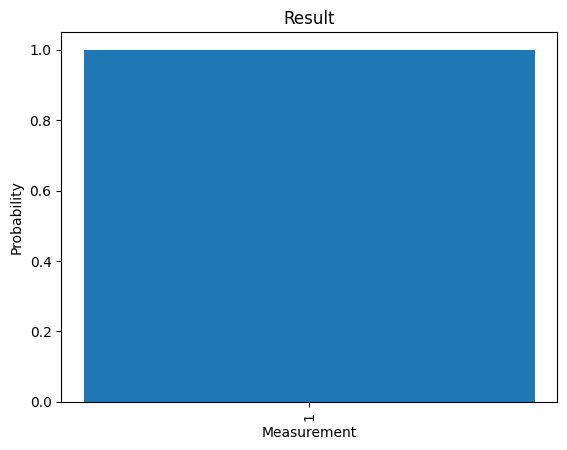

In [46]:
pyplot.bar(result.keys(), result.values())

pyplot.title("Result")
pyplot.xlabel("Measurement")
pyplot.ylabel("Probability")
pyplot.xticks(rotation = 90)

pyplot.show()

### **Exercise #3.3: The Full Process (Practice Together)**

Finally, let's see how we would go through this entire process. Specifically, we will create, execute, and visualize an operation that prepares 4 qubits in the $|-\rangle$ state and returns the results of measuring them. We will use the `"ionq.simulator"` target for this. We will follow the full 4 step process:
1. Declare the operation in python.
2. Create the operation in Q#.
3. Execute the operation in python.
4. Visualize the result in python.

#### **1. Declare the operation in python.**

Let's call it `Measure4Minuses`.

In [ ]:
Measure4Minuses : any = None

#### **2. Create the operation in Q#.**

In [ ]:
%%qsharp

operation Measure4Minuses() : Result[] {
    
    qs = // COMPLETE THIS LINE

    for i in 0 .. 3 {
        // COMPLETE THIS CODE
    }

    return MultiM(qs);
}

#### **3. Execute the operation in python.**

In [ ]:
result = qsharp.azure.execute(Measure4Minuses, shots = 100, jobName = "Exercise #3.3", timeout = 240)

#### **4. Visualize the result in python.**

In [ ]:
pyplot.bar(result.keys(), result.values())

pyplot.title("Result")
pyplot.xlabel("Measurement")
pyplot.ylabel("Probability")
pyplot.xticks(rotation = 90)

pyplot.show()

### **Exercise #3.4 (Practice Together)**

Let's see how to execute an operation requiring parameters. Specifically, we will create, execute, and visualize the results of an operation that takes an Int, prepares that number of qubits in the $|1\rangle$ state, and returns the results of measuring them. We will use the `"ionq.simulator"` target for this and follow the full 4 step process:
1. Declare the operation in python.
2. Create the operation in Q#.
3. Execute the operation in python.
4. Visualize the result in python.

#### **1. Declare the operation in python.**

Let's call it `ApplyXToNQubits`.

#### **2. Create the operation in Q#.**

In [ ]:
%%qsharp

operation ApplyXToNQubits(// COMPLETE THIS CODE
    // COMPLETE THIS CODE                  
}

#### **3. Execute the operation in python.**

**NOTE:** Specify that the parameter `jobName = "Exercise #3.4"` and keep the number of shots and the timeout the same as above.

In [ ]:
result = qsharp.azure.execute(ApplyXToNQubits, # COMPLETE THIS LINE

#### **4. Visualize the result in python.**

In [ ]:
pyplot.bar(# COMPLETE THIS LINE

pyplot.title("Result")
pyplot.xlabel("Measurement")
pyplot.ylabel("Probability")
pyplot.xticks(rotation = 90)

pyplot.show()

### **[OPTIONAL] Exercise #3.5**

Create, execute, and visualize the results of an operation that implements the circuit shown below. Use the `"ionq.simulator"` target for this and follow the full 4 step process:
1. Declare the operation in python.
2. Create the operation in Q#.
3. Execute the operation in python.
4. Visualize the result in python.

<br>

#### **The circuit to implement:**

![Bell State](https://www.quantum-bits.org/wp-content/uploads/2018/03/gate-entangle.png)

#### **1. Declare the operation in python.**

Let's call it `ImplementCircuit`.

#### **2. Create the operation in Q#.**

In [ ]:
%%qsharp

operation ImplementCircuit(// COMPLETE THIS CODE
    // COMPLETE THIS CODE     

    CX(qs[0], qs[1]);             
}

#### **3. Execute the operation in python.**

**NOTE:** Specify that the parameter `jobName = "Exercise #3.5"` and keep the number of shots and the timeout the same as above.

In [ ]:
result = # COMPLETE THIS LINE

#### **4. Visualize the result in python.**

In [ ]:
pyplot.bar(# COMPLETE THIS LINE

pyplot.title("Result")
pyplot.xlabel("Measurement")
pyplot.ylabel("Probability")
pyplot.xticks(rotation = 90)

pyplot.show()

## **[OPTIONAL] Part #4: More Q# Practice**


**NOTE**: You only need to work in Q# for this part. You do not need to work in python at all for these exercises.

### **Exercise #1: What is wrong with this code?**

#### **1.**

In [ ]:
%%qsharp
operation Test() : Unit {
    Message("no")
}

#### **2.**

In [ ]:
%%qsharp

operation Superpositions() : Result[] {
        ApplyToEachA(H, qs);
        return MultiM();
    }

#### **3.**

In [ ]:
%%qsharp
operation Mystery(nQubits : Int) : Unit {
    qs = Qubit[nQubits];
}

#### **4.**

In [ ]:
%%qsharp
use register = Qubit[nQubits];
ApplyToEachA(H, register);
return MultiM(register);

#### **5.**

In [ ]:
%%qsharp
operation SampleRandomNumber(nQubits : Int) : Unit {
    
    use register = Qubit[nQubits];
    ApplyToEachA(H, register);

    return MultiM(register);
}

#### **6.**

In [ ]:
%%qsharp
operation SampleRandomNumber(nQubits : Int) : Result[] {
    use register = Qubit[nQubits];
    ApplyToEachA(H, register);
}

### **Exercise #2: Operation Headers**

Create Operation headers with the arguments and return types described for each problem. 

#### **1.**

An operation called ApplyHadamard that:
* Takes in one qubit as input.
* Returns the type Unit.

#### **2.**

An operation called AddTwo that:
* Takes in one Int as input.
* Returns the type Int.

#### **3.**
An operation called OddCNOT that:
* Takes in one Int as input named n.
* Returns the type Result[].

### **Exercise #3: Writing Operations**

Write the full code for the operations you created in the exercise above.

#### **1.**

An operation called ApplyHadamard that:
* Takes in one qubit as input.
* Returns the type Unit.
* Applys the Hadamard gate to the input qubit.

#### **2.**

An operation called AddTwo that:
* Takes in one Int as input.
* Returns the type Int.
* Adds 2 to the input and returns the result.

#### **3.**
An operation called OddCNOT that:
* Takes in one Int as input named n.
* Returns the type Result[].
* Uses an Array of qubits with the size of the input Int.
* Applies a Hadamard gate to each qubit.
* Applies a CNOT gate to qubits in odd positions only. For instance, CNOT on qubits 1 and 3, qubits 3 and 5, so on so forth.
* Return the result of measuring all qubits.

<br>

**NOTE**: This is a particularly challenging problem. It is ok if you are not sure how to do it!

### **Exercise #4: If statements and loops**

#### **1. Complete the code below to return true if the input number is 6 and false otherwise.**

In [ ]:
%%qsharp
operation Is6(n : Int) : Bool {

  // YOUR CODE HERE
}

#### **2. Complete the code below to return true if the input number is odd and false otherwise.**

In [ ]:
%%qsharp
operation IsOdd(n : Int) : Bool {

  // YOUR CODE HERE
  
}

#### **3. Complete the code below to return the sum of all Ints from 0 to the input number.**

In [ ]:
%%qsharp
operation SumZeroN(n : Int) : Int { 

  // COMPLETE THIS CODE

  for  // COMPLETE THIS LINE {
      set s =  // COMPLETE THIS LINE
  }
  return s
}

#### **4. Complete the code below to apply an X gate to 10 qubits and return the result of measuring them.**

In [ ]:
%%qsharp
operation ATETest() : Result[] {
    
    use qs = Qubit[10];
    // COMPLETE THIS LINE

    return MultiM(qs);
}

# End of Notebook
---
© 2023 The Coding School, All rights reserved